In [2]:
from utils.openai_helpers import query_openai_model
from utils.preprocess_functions import convert_to_triplets, top_n_entities, triplets_containing_entity
from utils.preprocess_functions import get_labels_and_descriptions_for_triplets, format_triplets_text
from utils.wiki_helpers import get_label_for_qid, get_triplet_labels
from utils.prompt_functions import get_prompt_v1, get_prompt_v2
from utils.graph_plotting_helpers import plot_triplets_graph
import json

In [3]:
with open('inputs/wikidata5m/wikidata5m_transductive_valid.txt', 'r') as file:
    wiki_valid = file.readlines()

In [4]:
list_of_triplets = convert_to_triplets(wiki_valid)

In [5]:
list_of_triplets[:5]

[('Q3576734', 'P495', 'Q30'),
 ('Q641724', 'P1412', 'Q1860'),
 ('Q959357', 'P39', 'Q49476'),
 ('Q4263990', 'P105', 'Q7432'),
 ('Q4119101', 'P171', 'Q2906912')]

In [6]:
len(list_of_triplets)

5163

In [7]:
top_entities = top_n_entities(list_of_triplets, 30)

In [8]:
top_entities

[('Q5', 377),
 ('Q30', 202),
 ('Q16521', 84),
 ('Q145', 67),
 ('Q7432', 64),
 ('Q2736', 53),
 ('Q1860', 52),
 ('Q82955', 42),
 ('Q6723', 38),
 ('Q486972', 33),
 ('Q6655', 33),
 ('Q937857', 33),
 ('Q16', 31),
 ('Q183', 30),
 ('Q532', 28),
 ('Q11424', 28),
 ('Q482994', 25),
 ('Q794', 23),
 ('Q142', 23),
 ('Q33999', 22),
 ('Q668', 21),
 ('Q408', 20),
 ('Q571', 20),
 ('Q134556', 19),
 ('Q34740', 15),
 ('Q4830453', 15),
 ('Q38', 14),
 ('Q336286', 13),
 ('Q8502', 13),
 ('Q188', 13)]

In [9]:
req_list = triplets_containing_entity(list_of_triplets, 'Q38')

In [10]:
req_list

[('Q3835811', 'P495', 'Q38'),
 ('Q19577450', 'P27', 'Q38'),
 ('Q3770400', 'P27', 'Q38'),
 ('Q1223267', 'P17', 'Q38'),
 ('Q327719', 'P27', 'Q38'),
 ('Q7335559', 'P17', 'Q38'),
 ('Q2314711', 'P17', 'Q38'),
 ('Q955524', 'P27', 'Q38'),
 ('Q3631503', 'P20', 'Q38'),
 ('Q46462', 'P17', 'Q38'),
 ('Q1637348', 'P17', 'Q38'),
 ('Q53195', 'P17', 'Q38'),
 ('Q3138845', 'P495', 'Q38'),
 ('Q1131395', 'P17', 'Q38')]

In [11]:
# generated_text, usage = query_openai_model("What is the capital of France?")

In [12]:
get_label_for_qid('Q3835811')

('Catch as Catch Can', '1967 film by Franco Indovina')

In [13]:
get_triplet_labels(('Q3835811', 'P495', 'Q38'))

(('Catch as Catch Can', 'country of origin', 'Italy'),
 ('1967 film by Franco Indovina',
  'country of origin of this item (creative work, food, phrase, product, etc.)',
  'country in Southern Europe'))

In [14]:
triplet_list, desc_list = get_labels_and_descriptions_for_triplets(req_list)

  0%|          | 0/14 [00:00<?, ?it/s]

100%|██████████| 14/14 [00:11<00:00,  1.21it/s]


In [15]:
triplet_list

[('Catch as Catch Can', 'country of origin', 'Italy'),
 ('Lodovico Nulli', 'country of citizenship', 'Italy'),
 ('Giuseppe Danise', 'country of citizenship', 'Italy'),
 ('Gulf of La Spezia', 'country', 'Italy'),
 ('Luigi Ferdinando Tagliavini', 'country of citizenship', 'Italy'),
 ('Ripabianca', 'country', 'Italy'),
 ('Arzani-Volpini', 'country', 'Italy'),
 ('Franco Brusati', 'country of citizenship', 'Italy'),
 ('Anna Palm de Rosa', 'place of death', 'Italy'),
 ('San Zenone degli Ezzelini', 'country', 'Italy'),
 ('Messner Mountain Museum', 'country', 'Italy'),
 ('Sequals', 'country', 'Italy'),
 ('Ho!', 'country of origin', 'Italy'),
 ('Montefioralle', 'country', 'Italy')]

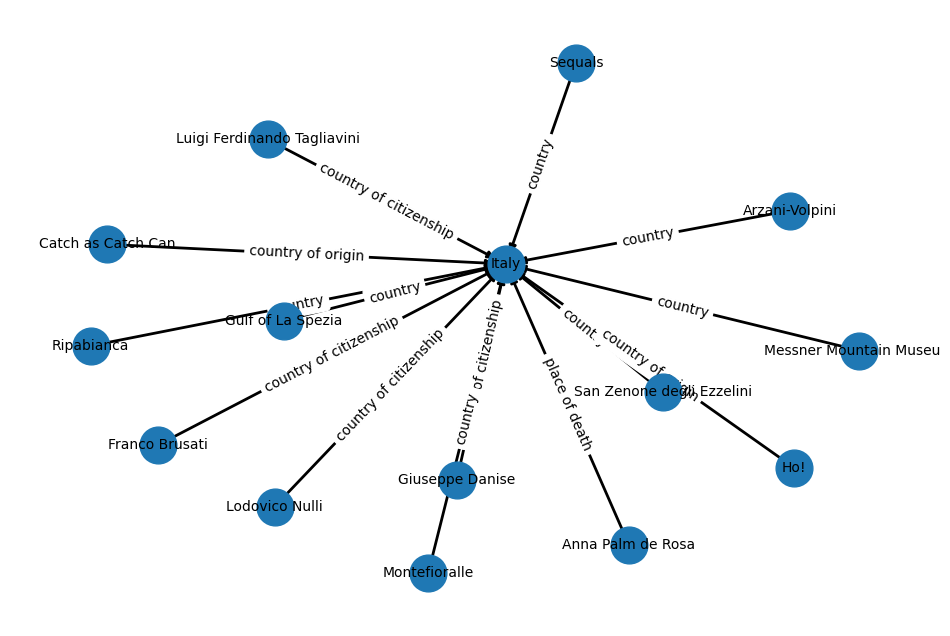

In [16]:
plot_triplets_graph(triplet_list)

In [16]:
triplet_text = format_triplets_text(triplet_list, desc_list)
print(triplet_text)

(Catch as Catch Can (1967 film by Franco Indovina), country of origin, Italy (country in Southern Europe))
(Lodovico Nulli (sport shooter), country of citizenship, Italy (country in Southern Europe))
(Giuseppe Danise (Italian opera singer (1882-1963)), country of citizenship, Italy (country in Southern Europe))
(Gulf of La Spezia (body of water on the north-western coast of Italy), country, Italy (country in Southern Europe))
(Luigi Ferdinando Tagliavini (Italian musician), country of citizenship, Italy (country in Southern Europe))
(Ripabianca (human settlement in Deruta, Italy), country, Italy (country in Southern Europe))
(Arzani-Volpini (also known as Scuderia Volpini, Italian Formula One constructor), country, Italy (country in Southern Europe))
(Franco Brusati (Italian film director and screenwriter), country of citizenship, Italy (country in Southern Europe))
(Anna Palm de Rosa (Swedish artist (1859-1924)), place of death, Italy (country in Southern Europe))
(San Zenone degli Ez

In [17]:
prompt = get_prompt_v1(triplet_text)
print(prompt)


Use the triplets and their descriptions provided below to generate a coherent paragraph.
You may use only a subset of the triplets if you wish. The focus is to generate a paragraph that is natural, coherent and informative.

Return the paragraph generated, and a mapping for each triplet to the claim in the paragraph that it was used to generate.

Structure your response as a JSON object with the following keys:
- "mapping": A dictionary mapping each claim in the paragraph to the triplet or set of triplets that were used to generate it.
- "paragraph": The paragraph generated

The triplets and their descriptions provided in brackets are as follows:
(Catch as Catch Can (1967 film by Franco Indovina), country of origin, Italy (country in Southern Europe))
(Lodovico Nulli (sport shooter), country of citizenship, Italy (country in Southern Europe))
(Giuseppe Danise (Italian opera singer (1882-1963)), country of citizenship, Italy (country in Southern Europe))
(Gulf of La Spezia (body of wat

In [22]:
generated_text, usage = query_openai_model(prompt)

In [18]:
print(generated_text)

{
  "mapping": {
    "Italy has been the birthplace and home to numerous influential individuals across various fields, including the arts, sports, and cinema.": ["Lodovico Nulli (sport shooter), country of citizenship, Italy (country in Southern Europe)", "Giuseppe Danise (Italian opera singer (1882-1963)), country of citizenship, Italy (country in Southern Europe)", "Luigi Ferdinando Tagliavini (Italian musician), country of citizenship, Italy (country in Southern Europe)", "Franco Brusati (Italian film director and screenwriter), country of citizenship, Italy (country in Southern Europe)"],
    "It also serves as the setting for significant human settlements and natural wonders, contributing to its cultural and geographical diversity.": ["Gulf of La Spezia (body of water on the north-western coast of Italy), country, Italy (country in Southern Europe)", "Ripabianca (human settlement in Deruta, Italy), country, Italy (country in Southern Europe)", "San Zenone degli Ezzelini (Italian 

In [19]:
gen = json.loads(generated_text)

In [20]:
print(gen['paragraph'])

Italy has been the birthplace and home to numerous influential individuals across various fields, including the arts, sports, and cinema. It also serves as the setting for significant human settlements and natural wonders, contributing to its cultural and geographical diversity. Furthermore, Italy's contribution to the automotive and entertainment industries is highlighted through the presence of entities like Arzani-Volpini and the production of films such as 'Catch as Catch Can' and 'Ho!'. The country also attracts international talents and has been the final resting place for notable figures like Anna Palm de Rosa, further enriching its cultural tapestry.


In [21]:
print(gen['mapping'])

{'Italy has been the birthplace and home to numerous influential individuals across various fields, including the arts, sports, and cinema.': ['Lodovico Nulli (sport shooter), country of citizenship, Italy (country in Southern Europe)', 'Giuseppe Danise (Italian opera singer (1882-1963)), country of citizenship, Italy (country in Southern Europe)', 'Luigi Ferdinando Tagliavini (Italian musician), country of citizenship, Italy (country in Southern Europe)', 'Franco Brusati (Italian film director and screenwriter), country of citizenship, Italy (country in Southern Europe)'], 'It also serves as the setting for significant human settlements and natural wonders, contributing to its cultural and geographical diversity.': ['Gulf of La Spezia (body of water on the north-western coast of Italy), country, Italy (country in Southern Europe)', 'Ripabianca (human settlement in Deruta, Italy), country, Italy (country in Southern Europe)', 'San Zenone degli Ezzelini (Italian comune), country, Italy 

In [23]:
print(generated_text)

{
  "mapping": {
    "Italy is renowned for its diverse contributions to culture, sports, and the arts, a tradition that spans from historical towns to the cinematic and operatic stages.": ["Catch as Catch Can (1967 film by Franco Indovina), country of origin, Italy (country in Southern Europe)", "Lodovico Nulli (sport shooter), country of citizenship, Italy (country in Southern Europe)", "Giuseppe Danise (Italian opera singer (1882-1963)), country of citizenship, Italy (country in Southern Europe)", "Luigi Ferdinando Tagliavini (Italian musician), country of citizenship, Italy (country in Southern Europe)", "Franco Brusati (Italian film director and screenwriter), country of citizenship, Italy (country in Southern Europe)"],
    "From the serene Gulf of La Spezia to the charming streets of Ripabianca and Montefioralle, Italy's geography is as rich and varied as its cultural output.": ["Gulf of La Spezia (body of water on the north-western coast of Italy), country, Italy (country in So

In [18]:
prompt = get_prompt_v2(triplet_text)
print(prompt)
generated_text, usage = query_openai_model(prompt)
print(generated_text)


Use the triplets and their descriptions provided below to generate a coherent paragraph.
You may use only a subset of the triplets if you wish. The focus is to generate a paragraph that is natural, coherent and informative.


Return the paragraph generated, and a mapping for each triplet to the claim in the paragraph that it was used to generate.

Structure your response as a JSON object with the following keys:
- "mapping": A dictionary mapping each claim in the paragraph to the triplet or set of triplets that were used to generate it.
- "paragraph": The paragraph generated

NOTE: The mapping only needs to be at the level of the triplet, not the individual entities within the triplet. 
For example, if the paragraph contains the claim "The capital of France is Paris", the mapping should indicate that this claim was generated using the triplet ("France", "capital", "Paris").
Both the subject and object entities should be mentioned in the corresponding claim in the paragraph.

The tripl

In [19]:
print(generated_text)

{
  "mapping": {
    "Italy is home to a rich tapestry of culture, history, and notable figures across various fields, including cinema, sports, music, and more.": ["Catch as Catch Can (1967 film by Franco Indovina), country of origin, Italy (country in Southern Europe)", "Lodovico Nulli (sport shooter), country of citizenship, Italy (country in Southern Europe)", "Giuseppe Danise (Italian opera singer (1882-1963)), country of citizenship, Italy (country in Southern Europe)", "Luigi Ferdinando Tagliavini (Italian musician), country of citizenship, Italy (country in Southern Europe)", "Franco Brusati (Italian film director and screenwriter), country of citizenship, Italy (country in Southern Europe)"],
    "Its diverse landscapes include the Gulf of La Spezia, a beautiful body of water on the north-western coast, and the picturesque human settlements of Ripabianca and Montefioralle.": ["Gulf of La Spezia (body of water on the north-western coast of Italy), country, Italy (country in Sou

In [20]:
generated_text, usage = query_openai_model(prompt)
print(generated_text)

In [21]:
print(generated_text)

{
  "mapping": {
    "Italy has been the birthplace or significant location for a diverse range of talents, including filmmakers Franco Indovina and Robert Enrico, opera singer Giuseppe Danise, and sports shooter Lodovico Nulli.": ["Catch as Catch Can (1967 film by Franco Indovina), country of origin, Italy (country in Southern Europe)", "Ho! (1968 film by Robert Enrico), country of origin, Italy (country in Southern Europe)", "Giuseppe Danise (Italian opera singer (1882-1963)), country of citizenship, Italy (country in Southern Europe)", "Lodovico Nulli (sport shooter), country of citizenship, Italy (country in Southern Europe)"],
    "The nation's contributions to culture extend further with musicians like Luigi Ferdinando Tagliavini and filmmakers like Franco Brusati, showcasing Italy's rich artistic heritage.": ["Luigi Ferdinando Tagliavini (Italian musician), country of citizenship, Italy (country in Southern Europe)", "Franco Brusati (Italian film director and screenwriter), coun